## Data preprocessing

In [3]:

file = open('raw.text.whatsapp.txt', 'r', encoding = 'utf8')

text = file.readlines()
data = []
for line in text:
    data.append(line.split(': ')[0])
    
del data[0]
del data[0]

cleaned_data = []
for line in data:
    if line[0].isdigit():
        # print(line)
        cleaned_data.append(line)

sender = []
date_time = []
for line in cleaned_data:
    print(line)
    splitted_line = line.split('-')
    date_time.append(splitted_line[0])
    sender.append(splitted_line[1])
    # print(splitted_line[0])

date = []
# time = []
for line in date_time:
    splitted_line = line.split(', ')
    date.append(splitted_line[0].strip())
    # time.append(splitted_line[1].strip())
    # print(splitted_line[0], '-:-', splitted_line[1])

import pandas as pd

df = pd.DataFrame(
    {
        'Date' : date,
        'Sender' : sender
    }
)

df.head()

12/8/22, 12:58 - Taha
12/8/22, 12:59 - Haris trier
12/8/22, 12:59 - Haris trier
12/8/22, 12:59 - Taha
12/8/22, 13:05 - Taha
12/8/22, 13:05 - Taha
12/8/22, 13:06 - Taha
12/8/22, 13:10 - Haris trier
12/14/22, 10:40 - Taha
12/14/22, 10:40 - Taha
12/14/22, 11:17 - Haris trier
12/14/22, 11:20 - Taha
12/14/22, 11:20 - Taha
12/14/22, 11:20 - Haris trier
12/14/22, 11:20 - Haris trier
12/14/22, 11:21 - Taha
12/14/22, 11:21 - Taha
12/14/22, 12:55 - Taha
12/14/22, 12:56 - Taha
12/14/22, 12:56 - Haris trier
12/14/22, 12:56 - Taha
12/14/22, 21:55 - Taha
12/14/22, 22:00 - Haris trier
12/14/22, 22:00 - Taha
12/14/22, 22:00 - Taha
12/14/22, 22:02 - Haris trier
12/14/22, 22:04 - Taha
12/14/22, 22:04 - Haris trier
12/14/22, 22:05 - Taha
12/15/22, 00:17 - Taha
12/15/22, 00:18 - Taha
12/15/22, 00:33 - Taha
12/15/22, 00:33 - Taha
1/23/23, 15:24 - Haris trier
1/23/23, 15:24 - Haris trier
1/23/23, 15:30 - Taha
1/23/23, 15:30 - Taha
1/23/23, 15:30 - Taha
1/23/23, 15:31 - Haris trier
1/23/23, 15:32 - Haris tri

IndexError: list index out of range

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Time'] = pd.to_datetime(df['Time'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# df['hour'] = df['Time'].dt.hour
# df['minutes'] = df['Time'].dt.minute

df.drop(columns = ['Date'], inplace=True)

df.head()

C:\Users\tahak\AppData\Local\Temp\ipykernel_21624\2703511778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Sender,year,month,day
0,Taha,2023,9,14
1,Me Germany,2023,9,16
2,Taha,2023,9,18
3,Me Germany,2023,10,4
4,Taha,2023,10,22


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sender'] = encoder.fit_transform(df['Sender'])

df.head()

,Sender,year,month,day
0,1,2023,9,14
1,0,2023,9,16
2,1,2023,9,18
3,0,2023,10,4
4,1,2023,10,22


## Model development

In [40]:
Y = df['Sender']
X = df.drop(columns = ['Sender'])


,year,month,day,hour,minutes
0,2023,9,14,19,32
1,2023,9,16,15,4
2,2023,9,18,12,17
3,2023,10,4,12,43
4,2023,10,22,14,52


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1)

In [72]:
string = [1]

if string:
    print('hee')

hee


# Word Cloud

## Data Preprocessing

In [120]:
def extract_received_messages(file_path,omit_sender = [], sent = False):
    messages = []

    with open(file_path, 'r', encoding = 'utf8') as file:
        for line in file:
            # Use regular expression to extract the message part after ': '
            sender_message_match = re.match(r'.*? - (.*?): (.*)', line)
            if sender_message_match:
                sender, message = sender_message_match.groups()
                if omit_sender and sender not in omit_sender:
                    messages.append(message)    
    return messages

def extract_sent_messages(file_path,omit_sender = []):
    messages = []

    with open(file_path, 'r', encoding = 'utf8') as file:
        for line in file:
            # Use regular expression to extract the message part after ': '
            sender_message_match = re.match(r'.*? - (.*?): (.*)', line)
            if sender_message_match:
                sender, message = sender_message_match.groups()
                if omit_sender and sender in omit_sender:
                    messages.append(message)  
    return messages


                    

In [111]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


file_path = "raw_data.txt"

## ---- for received messages
received_messages = extract_received_messages(file_path,['TahaKZed', 'Taha'])
received_refined_messages = []
for line in received_messages:
    if line != '<Media omitted>' and line != 'null':
        received_refined_messages.append(line)

received_text = ' '.join(line for line in received_refined_messages)


stop_words = set(stopwords.words('english'))

received_word_tokens = word_tokenize(received_text)
received_filtered_tokens = [w for w in received_word_tokens if not w.lower() in stop_words]

received_filtered_text = ' '.join(word for word in received_filtered_tokens if word not in ['s', 't', 'n\'t', '\'s', '\'ll']) 

## ---- for sent messages
sent_messages = extract_sent_messages(file_path,['TahaKZed', 'Taha'])
sent_refined_messages = []
for line in sent_messages:
    if line != '<Media omitted>' and line != 'null':
        sent_refined_messages.append(line)

sent_text = ' '.join(line for line in sent_refined_messages)


stop_words = set(stopwords.words('english'))

sent_word_tokens = word_tokenize(sent_text)
sent_filtered_tokens = [w for w in sent_word_tokens if not w.lower() in stop_words]

sent_filtered_text = ' '.join(word for word in sent_filtered_tokens if word not in ['s', 't', 'n\'t', '\'s', '\'ll']) 

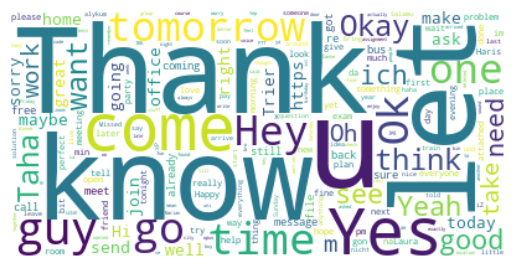

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloudr = WordCloud(collocations = False, background_color = 'white').generate(received_filtered_text)
# Display the generated Word Cloud
plt.imshow(word_cloudr, interpolation='bilinear')
plt.axis("off")
plt.show()

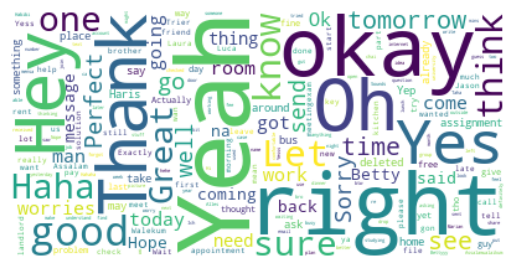

In [113]:

word_clouds = WordCloud(collocations = False, background_color = 'white').generate(sent_filtered_text)
# Display the generated Word Cloud
plt.imshow(word_clouds, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

## Generate Dataframe

In [5]:
import pandas as pd
import re
def generate_dataframe(file_path):
    messages = []
    date=[]
    time=[]
    senders=[]
    with open(file_path, 'r', encoding = 'utf8') as file:
        for line in file:
            # Use regular expression to extract the message part after ': '
            sender_message_match = re.match(r'(.*?) - (.*?): (.*)', line)
            if sender_message_match:
                #print(sender_message_match.groups())
                timestamp, sender, message = sender_message_match.groups()
                senders.append(sender.strip())
                messages.append(message.strip())  
                #timestamp = line.split(' - ')[0]
                split_timestamp = timestamp.split(', ')
                date.append(split_timestamp[0].strip())
                time.append(split_timestamp[1].strip())

    df = pd.DataFrame(
        {
            'date': date,
            'time': time,
            'sender': senders,
            'content': messages
        }
    )
    return df

In [6]:
df = generate_dataframe('raw_data.txt')
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time']).dt.strftime('%H:%M')
# df.drop(columns = ['time'], inplace = True)
df.head()

C:\Users\tahak\AppData\Local\Temp\ipykernel_12468\1151901327.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])
C:\Users\tahak\AppData\Local\Temp\ipykernel_12468\1151901327.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time']).dt.strftime('%H:%M')


,date,time,sender,content
0,2023-04-04,15:11,Taha,Hey Elizabetta! 👋🏻 How are you doing? Taha her...
1,2023-04-05,13:05,Taha,Hey are you home now? I wanted to pay for the ...
2,2023-04-05,13:06,Elisabetta,Yes stop by
3,2023-04-05,13:06,Elisabetta,Room 107
4,2023-04-05,13:06,Taha,Right. In which building is it? I forgot 😅


## Text preprocessing

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

refined_content = []
lemmatizer = WordNetLemmatizer()
garbage = ['n\'t', 's', 't', '\'ll']
punctuation = '!.?,-_/()\''
english_stopwords = set(stopwords.words('english'))

for line in df['content']:#[df['content']!='<Media omitted>']:
    tokens = word_tokenize(line)
    new_line = ' '.join([lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in english_stopwords and word not in punctuation and word not in garbage])
    refined_content.append(new_line)

len(refined_content)


9422

In [6]:
import torch

from transformers import AlbertForSequenceClassification, AlbertTokenizer

model_name = 'albert-base-v2'
model = AlbertForSequenceClassification.from_pretrained(model_name)
tokenizer = AlbertTokenizer.from_pretrained(model_name)


inputs = tokenizer(refined_content, return_tensors = 'pt', padding = True, truncation = True)


if torch.cuda.is_available():
    print(torch.cuda.is_available())
    device = torch.device('cuda')
    # model = model.half()
    model = model.to(device)
    inputs = {key: value.to(device) for key,value in inputs.items()}

# Perform sentiment analysis
batch_size = 8  # Adjust as needed
num_samples = len(refined_content)
num_batches = (num_samples + batch_size - 1) // batch_size

predicted_probs = []
for i in range(num_batches):
    batch_inputs = {key: value[i*batch_size:(i+1)*batch_size] for key, value in inputs.items()}
    
    # Perform sentiment analysis
    with torch.no_grad():
        batch_outputs = model(**batch_inputs)
    
    # Get predicted labels
    batch_predicted_probs = torch.softmax(batch_outputs.logits, dim=1).cpu().numpy()
    predicted_probs.extend(batch_predicted_probs)


# with torch.no_grad():
#     outputs = model(**inputs)

# predicted_labels = torch.argmax(outputs.logits, dim=1).cpu().numpy()

print('Done')

C:\Users\tahak\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


True
Done


In [9]:
sentiment_labels = []

diff_threshold = 0.05

for probs in predicted_probs:
    if abs(probs[0] - probs[1]) <= diff_threshold:
        sentiment_labels.append('neutral')
    else:
        if probs[0] > probs[1]:
            sentiment_labels.append('negative')
        elif probs[1] > probs[0]:
            sentiment_labels.append('positive')

sent_df = pd.DataFrame(
    {
        'content' : df['content'],#[df['content']!='<Media omitted>'],
        'sentiment' : sentiment_labels
        
    }
)

sent_df.head()

,content,sentiment
0,Hey Elizabetta! 👋🏻 How are you doing? Taha her...,positive
1,Hey are you home now? I wanted to pay for the ...,positive
2,Yes stop by,positive
3,Room 107,negative
4,Right. In which building is it? I forgot 😅,positive


In [34]:
# Determine sentiment labels
sentiment_labels = []
threshold = 0.55  # Adjust as needed
for probs in predicted_probs:
    if probs[0] > threshold:
        sentiment_labels.append('Negative')
    elif probs[1] > threshold:
        sentiment_labels.append('Positive')
    else:
        sentiment_labels.append('Neutral')

sent_df2 = pd.DataFrame(
    {
        'content' : df['content'],#[df['content']!='<Media omitted>'],
        'sentiment' : sentiment_labels
        
    }
)

sent_df2.head()

,content,sentiment
0,Hey Elizabetta! 👋🏻 How are you doing? Taha her...,Positive
1,Hey are you home now? I wanted to pay for the ...,Positive
2,Yes stop by,Positive
3,Room 107,Neutral
4,Right. In which building is it? I forgot 😅,Positive


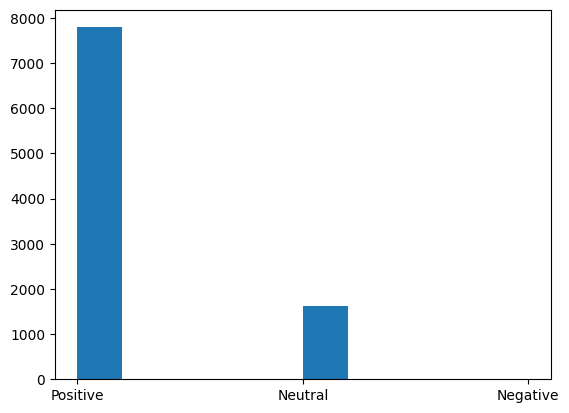

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(sent_df2['sentiment'])
plt.show()



In [36]:
sent_df2[sent_df2['sentiment'] == 'Negative']

,content,sentiment
8702,elisabettajarova@gmail.com,Negative
8714,Hariskhan5566@gmail.com,Negative


In [38]:
# !pip3 install --user torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# # !pip3 uninstall torch torchvision torchaudio

#df = df[df['content'] != '<Meida omitted>']
df['sentiment'] = sent_df2['sentiment']
df.head()

,date,time,sender,content,sentiment
0,2023-04-04,15:11,Taha,Hey Elizabetta! 👋🏻 How are you doing? Taha her...,Positive
1,2023-04-05,13:05,Taha,Hey are you home now? I wanted to pay for the ...,Positive
2,2023-04-05,13:06,Elisabetta,Yes stop by,Positive
3,2023-04-05,13:06,Elisabetta,Room 107,Neutral
4,2023-04-05,13:06,Taha,Right. In which building is it? I forgot 😅,Positive


In [47]:
gender_mapping = {
    'Taha' : 'male',
    'TahaKZed': 'male',
    'Elisabetta': 'female',
    'Ahmad': 'male',
    'Caro 🦋': 'female',
    'Hani': 'male',
    'Jason WG': 'male',
    'Laura 🦁': 'female',
    'Haris Trier': 'male',
    'Tobi Trier': 'male',
    'Nataliia' : 'female',
    '+49 1517 0067324': 'female',
    '+49 1590 1487289': 'male',
    'Martina': 'female',
    'Gloria': 'female',
    'Johanna': 'female',
    'Daniela TU': 'female',
    'Julia (Kitchen)': 'female',
    'Muhammad ahmed': 'male',
    'Luca Maes WG': 'male',
    'Elvedin Kujovic': 'male',
    'Ahsan Bhai Trier Classmate': 'male',
    'Patrick Stengel WG': 'male',
    'Azra Teacher' : 'female',
    'Omkiran Malepati': 'male',
    'TahaKZed': 'male',
    'Felix Sehmer': 'male',
    '+49 1573 0780310': 'female',
    'Marian': 'male'
}

text_count_mapping = {
    'Taha' : len(df[(df['sender'] == 'Taha') & (df['content']!='<Media omitted>')]),
    'TahaKZed': len(df[(df['sender'] == 'TahaKZed') & (df['content']!='<Media omitted>')]),
    'Elisabetta': len(df[(df['sender'] == 'Elisabetta') & (df['content']!='<Media omitted>')]),
    'Ahmad': len(df[(df['sender'] == 'Ahmad') & (df['content']!='<Media omitted>')]),
    'Caro 🦋': len(df[(df['sender'] == 'Caro 🦋') & (df['content']!='<Media omitted>')]),
    'Hani': len(df[(df['sender'] == 'Hani') & (df['content']!='<Media omitted>')]),
    'Jason WG': len(df[(df['sender'] == 'Jason WG') & (df['content']!='<Media omitted>')]),
    'Laura 🦁': len(df[(df['sender'] == 'Laura 🦁') & (df['content']!='<Media omitted>')]),
    'Haris Trier': len(df[(df['sender'] == 'Haris Trier') & (df['content']!='<Media omitted>')]),
    'Tobi Trier': len(df[(df['sender'] == 'Tobi Trier') & (df['content']!='<Media omitted>')]),
    'Nataliia' : len(df[(df['sender'] == 'Nataliia') & (df['content']!='<Media omitted>')]),
    '+49 1517 0067324': len(df[(df['sender'] == '+49 1517 0067324') & (df['content']!='<Media omitted>')]),
    '+49 1590 1487289': len(df[(df['sender'] == '+49 1590 1487289') & (df['content']!='<Media omitted>')]),
    'Martina': len(df[(df['sender'] == 'Martina') & (df['content']!='<Media omitted>')]),
    'Gloria': len(df[(df['sender'] == 'Gloria') & (df['content']!='<Media omitted>')]),
    'Johanna': len(df[(df['sender'] == 'Johanna') & (df['content']!='<Media omitted>')]),
    'Daniela TU': len(df[(df['sender'] == 'Daniela TU') & (df['content']!='<Media omitted>')]),
    'Julia (Kitchen)': len(df[(df['sender'] == 'Julia (Kitchen)') & (df['content']!='<Media omitted>')]),
    'Muhammad ahmed': len(df[(df['sender'] == 'Muhammad ahmed') & (df['content']!='<Media omitted>')]),
    'Luca Maes WG': len(df[(df['sender'] == 'Luca Maes WG') & (df['content']!='<Media omitted>')]),
    'Elvedin Kujovic': len(df[(df['sender'] == 'Elvedin Kujovic') & (df['content']!='<Media omitted>')]),
    'Ahsan Bhai Trier Classmate': len(df[(df['sender'] == 'Ahsan Bhai Trier Classmate') & (df['content']!='<Media omitted>')]),
    'Patrick Stengel WG': len(df[(df['sender'] == 'Patrick Stengel WG') & (df['content']!='<Media omitted>')]),
    'Azra Teacher' : len(df[(df['sender'] == 'Azra Teacher') & (df['content']!='<Media omitted>')]),
    'Omkiran Malepati': len(df[(df['sender'] == 'Omkiran Malepati') & (df['content']!='<Media omitted>')]),
    'Felix Sehmer': len(df[(df['sender'] == 'Felix Sehmer')  & (df['content']!='<Media omitted>')]),
    '+49 1573 0780310': len(df[(df['sender'] == '+49 1573 0780310')  & (df['content']!='<Media omitted>')]),
    'Marian': len(df[(df['sender'] == 'Marian') & (df['content']!='<Media omitted>')])
}


df['text_count'] = df['sender'].map(text_count_mapping)

media_count_mapping = {
    'Taha' : len(df[(df['sender'] == 'Taha') & (df['content']=='<Media omitted>')]),
    'TahaKZed': len(df[(df['sender'] == 'TahaKZed') & (df['content']=='<Media omitted>')]),
    'Elisabetta': len(df[(df['sender'] == 'Elisabetta') & (df['content']=='<Media omitted>')]),
    'Ahmad': len(df[(df['sender'] == 'Ahmad') & (df['content']=='<Media omitted>')]),
    'Caro 🦋': len(df[(df['sender'] == 'Caro 🦋') & (df['content']=='<Media omitted>')]),
    'Hani': len(df[(df['sender'] == 'Hani') & (df['content']=='<Media omitted>')]),
    'Jason WG': len(df[(df['sender'] == 'Jason WG') & (df['content']=='<Media omitted>')]),
    'Laura 🦁': len(df[(df['sender'] == 'Laura 🦁') & (df['content']=='<Media omitted>')]),
    'Haris Trier': len(df[(df['sender'] == 'Haris Trier') & (df['content']=='<Media omitted>')]),
    'Tobi Trier': len(df[(df['sender'] == 'Tobi Trier') & (df['content']=='<Media omitted>')]),
    'Nataliia' : len(df[(df['sender'] == 'Nataliia') & (df['content']=='<Media omitted>')]),
    '+49 1517 0067324': len(df[(df['sender'] == '+49 1517 0067324') & (df['content']=='<Media omitted>')]),
    '+49 1590 1487289': len(df[(df['sender'] == '+49 1590 1487289') & (df['content']=='<Media omitted>')]),
    'Martina': len(df[(df['sender'] == 'Martina') & (df['content']=='<Media omitted>')]),
    'Gloria': len(df[(df['sender'] == 'Gloria') & (df['content']=='<Media omitted>')]),
    'Johanna': len(df[(df['sender'] == 'Johanna') & (df['content']=='<Media omitted>')]),
    'Daniela TU': len(df[(df['sender'] == 'Daniela TU') & (df['content']=='<Media omitted>')]),
    'Julia (Kitchen)': len(df[(df['sender'] == 'Julia (Kitchen)') & (df['content']=='<Media omitted>')]),
    'Muhammad ahmed': len(df[(df['sender'] == 'Muhammad ahmed') & (df['content']=='<Media omitted>')]),
    'Luca Maes WG': len(df[(df['sender'] == 'Luca Maes WG') & (df['content']=='<Media omitted>')]),
    'Elvedin Kujovic': len(df[(df['sender'] == 'Elvedin Kujovic') & (df['content']=='<Media omitted>')]),
    'Ahsan Bhai Trier Classmate': len(df[(df['sender'] == 'Ahsan Bhai Trier Classmate') & (df['content']=='<Media omitted>')]),
    'Patrick Stengel WG': len(df[(df['sender'] == 'Patrick Stengel WG') & (df['content']=='<Media omitted>')]),
    'Azra Teacher' : len(df[(df['sender'] == 'Azra Teacher') & (df['content']=='<Media omitted>')]),
    'Omkiran Malepati': len(df[(df['sender'] == 'Omkiran Malepati') & (df['content']=='<Media omitted>')]),
    'Felix Sehmer': len(df[(df['sender'] == 'Felix Sehmer')  & (df['content']=='<Media omitted>')]),
    '+49 1573 0780310': len(df[(df['sender'] == '+49 1573 0780310')  & (df['content']=='<Media omitted>')]),
    'Marian': len(df[(df['sender'] == 'Marian') & (df['content']=='<Media omitted>')])
}

df['media_count'] = df['sender'].map(media_count_mapping)

df['gender'] = df['sender'].map(gender_mapping)
df.head()

,date,time,sender,content,sentiment,gender,text_count,media_count
0,2023-04-04,15:11,Taha,Hey Elizabetta! 👋🏻 How are you doing? Taha her...,Positive,male,2107.0,250.0
1,2023-04-05,13:05,Taha,Hey are you home now? I wanted to pay for the ...,Positive,male,2107.0,250.0
2,2023-04-05,13:06,Elisabetta,Yes stop by,Positive,female,1055.0,116.0
3,2023-04-05,13:06,Elisabetta,Room 107,Neutral,female,1055.0,116.0
4,2023-04-05,13:06,Taha,Right. In which building is it? I forgot 😅,Positive,male,2107.0,250.0


In [48]:
df.to_csv('cleaned_data.csv')

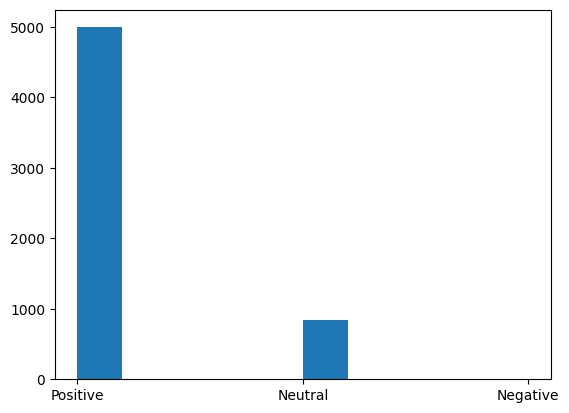

In [39]:
temp = df[~df['sender'].isin(['Taha', 'TahaKZed'])]
import matplotlib.pyplot as plt
plt.hist(temp['sentiment'].tolist())
plt.show()

### number of messages received according to year and month

       sender                                            content sentiment  \
2  Elisabetta                                        Yes stop by  positive   
3  Elisabetta                                           Room 107  positive   
5  Elisabetta                                        Same as you   neutral   
7  Elisabetta  We are going for a walk after lunch you coming...   neutral   
9  Elisabetta                                              Super   neutral   

   year  month  day  
2  2023      4    5  
3  2023      4    5  
5  2023      4    5  
7  2023      4    5  
9  2023      4    5  


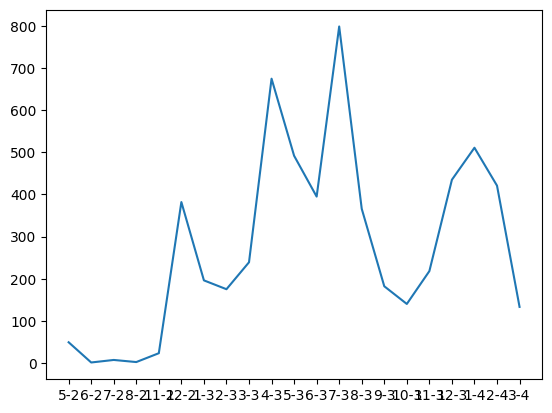

In [57]:
temp = df[~df['sender'].isin(['Taha', 'TahaKZed'])]
number_messages = temp.groupby(['year', 'month']).size()

number_messages_df = pd.DataFrame(
    {
        'month-year' : [str(string[1])+'-'+str(string[0])[3:] for string in number_messages.index.tolist()],
        'count' : number_messages.tolist()
    }
)

plt.plot(number_messages_df['month-year'], number_messages_df['count'])
plt.show()

### Gender-Based Sentiment analysis

In [80]:
df['sender'].unique()

gender_mapping = {
    'Taha' : 'male',
    'TahaKZed': 'male',
    'Elisabetta': 'female',
    'Ahmad': 'male',
    'Caro 🦋': 'female',
    'Hani': 'male',
    'Jason WG': 'male',
    'Laura 🦁': 'female',
    'Haris Trier': 'male',
    'Tobi Trier': 'male',
    'Nataliia' : 'female',
    '+49 1517 0067324': 'female',
    '+49 1590 1487289': 'male',
    'Martina': 'female',
    'Gloria': 'female',
    'Johanna': 'female',
    'Daniela TU': 'female',
    'Julia (Kitchen)': 'female',
    'Muhammad ahmed': 'male',
    'Luca Maes WG': 'male',
    'Elvedin Kujovic': 'male',
    'Ahsan Bhai Trier Classmate': 'male',
    'Patrick Stengel WG': 'male',
    'Azra Teacher' : 'female',
    'Omkiran Malepati': 'male',
    'TahaKZed': 'male',
    'Felix Sehmer': 'male',
    '+49 1573 0780310': 'female',
    'Marian': 'male'
}

df['gender'] = df['sender'].map(gender_mapping)

df.head()

,sender,content,sentiment,year,month,day,gender
0,Taha,Hey Elizabetta! 👋🏻 How are you doing? Taha her...,neutral,2023,4,4,male
1,Taha,Hey are you home now? I wanted to pay for the ...,neutral,2023,4,5,male
2,Elisabetta,Yes stop by,positive,2023,4,5,female
3,Elisabetta,Room 107,positive,2023,4,5,female
4,Taha,Right. In which building is it? I forgot 😅,neutral,2023,4,5,male


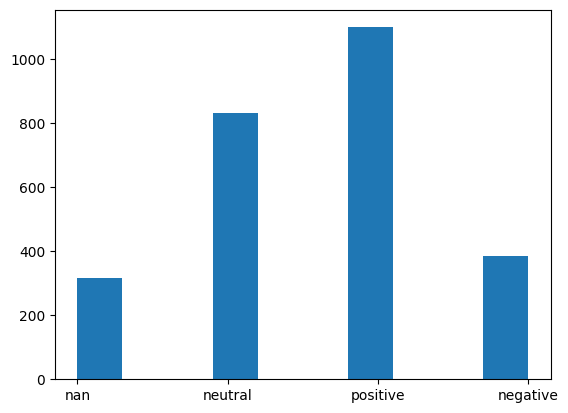

In [82]:
temp = df[~df['sender'].isin(['Taha', 'TahaKZed'])]
male_df = temp[temp['gender'] == 'male']
female_df = temp[temp['gender'] == 'female']

plt.hist(male_df['sentiment'].tolist())
plt.show()

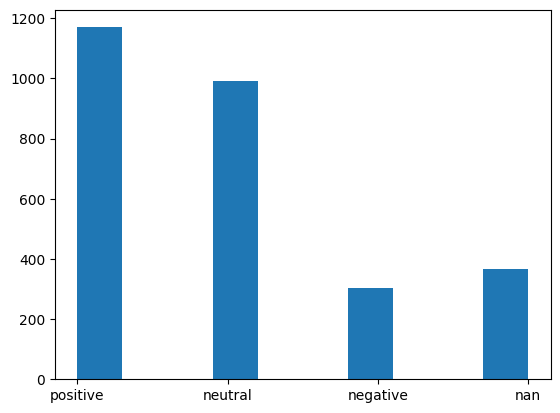

In [83]:

plt.hist(female_df['sentiment'].tolist())
plt.show()

### number of messages based on gender? 

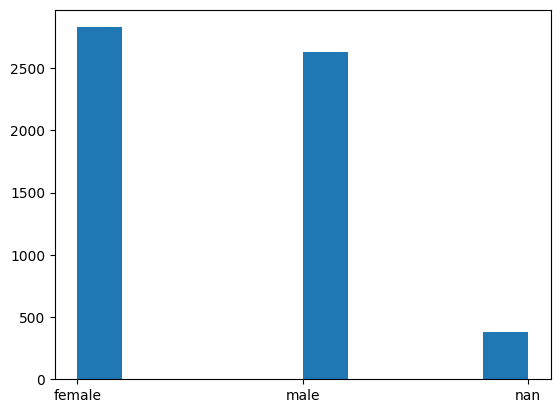

In [84]:
plt.hist(temp['gender'].tolist())
plt.show()

### number of messages based on individual

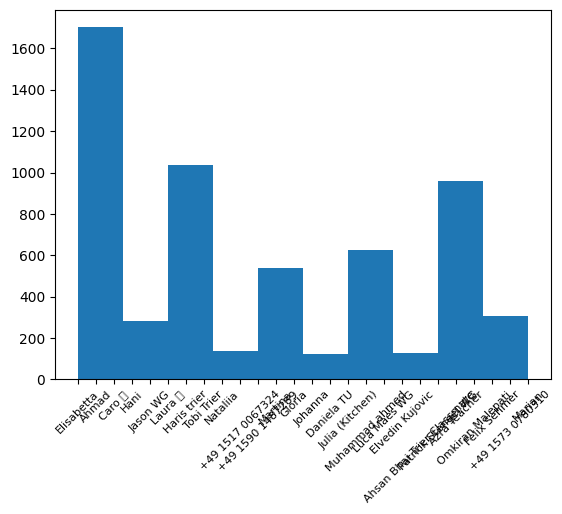

In [98]:

plt.hist(temp['sender'].tolist())
plt.xticks(fontsize=8, rotation=45)
plt.show()

In [102]:
len(temp[temp['sender'] == 'Elisabetta'])

count_mapping = {
    'Taha' : len(df[df['sender'] == 'Taha']),
    'TahaKZed': len(df[df['sender'] == 'TahaKZed']),
    'Elisabetta': len(df[df['sender'] == 'Elisabetta']),
    'Ahmad': len(df[df['sender'] == 'Ahmad']),
    'Caro 🦋': len(df[df['sender'] == 'Caro 🦋']),
    'Hani': len(df[df['sender'] == 'Hani']),
    'Jason WG': len(df[df['sender'] == 'Jason WG']),
    'Laura 🦁': len(df[df['sender'] == 'Laura 🦁']),
    'Haris Trier': len(df[df['sender'] == 'Haris Trier']),
    'Tobi Trier': len(df[df['sender'] == 'Tobi Trier']),
    'Nataliia' : len(df[df['sender'] == 'Nataliia']),
    '+49 1517 0067324': len(df[df['sender'] == '+49 1517 0067324']),
    '+49 1590 1487289': len(df[df['sender'] == '+49 1590 1487289']),
    'Martina': len(df[df['sender'] == 'Martina']),
    'Gloria': len(df[df['sender'] == 'Gloria']),
    'Johanna': len(df[df['sender'] == 'Johanna']),
    'Daniela TU': len(df[df['sender'] == 'Daniela TU']),
    'Julia (Kitchen)': len(df[df['sender'] == 'Julia (Kitchen)']),
    'Muhammad ahmed': len(df[df['sender'] == 'Muhammad ahmed']),
    'Luca Maes WG': len(df[df['sender'] == 'Luca Maes WG']),
    'Elvedin Kujovic': len(df[df['sender'] == 'Elvedin Kujovic']),
    'Ahsan Bhai Trier Classmate': len(df[df['sender'] == 'Ahsan Bhai Trier Classmate']),
    'Patrick Stengel WG': len(df[df['sender'] == 'Patrick Stengel WG']),
    'Azra Teacher' : len(df[df['sender'] == 'Azra Teacher']),
    'Omkiran Malepati': len(df[df['sender'] == 'Omkiran Malepati']),
    'TahaKZed': len(df[df['sender'] == 'TahaKZed']),
    'Felix Sehmer': len(df[df['sender'] == 'Felix Sehmer']),
    '+49 1573 0780310': len(df[df['sender'] == '+49 1573 0780310']),
    'Marian': len(df[df['sender'] == 'Marian'])
}

df['message_count'] = df['sender'].map(count_mapping)

df.head()

,sender,content,sentiment,year,month,day,gender,message_count
0,Taha,Hey Elizabetta! 👋🏻 How are you doing? Taha her...,neutral,2023,4,4,male,2357.0
1,Taha,Hey are you home now? I wanted to pay for the ...,neutral,2023,4,5,male,2357.0
2,Elisabetta,Yes stop by,positive,2023,4,5,female,1171.0
3,Elisabetta,Room 107,positive,2023,4,5,female,1171.0
4,Taha,Right. In which building is it? I forgot 😅,neutral,2023,4,5,male,2357.0


In [108]:
received_df = df[~df['sender'].isin(['Taha','TahaKZed'])]

received_count_df = pd.DataFrame(
    {
        'sender': received_df['sender'].unique(),
    }
)

received_count_df['message_count'] = received_count_df['sender'].map(count_mapping)

received_count_df.head()

,sender,message_count
0,Elisabetta,1171.0
1,Ahmad,205.0
2,Caro 🦋,325.0
3,Hani,100.0
4,Jason WG,183.0


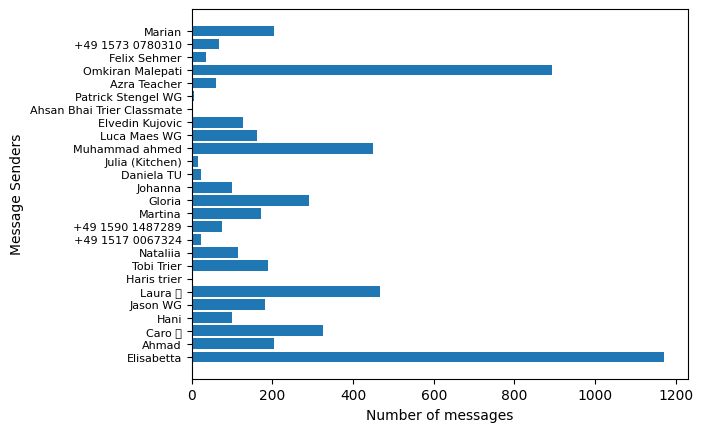

In [112]:
plt.barh('sender', 'message_count', data=received_count_df)
plt.xlabel('Number of messages')
plt.ylabel('Message Senders')
plt.yticks(fontsize=8,)
plt.show()

### Sentiments in individual messages

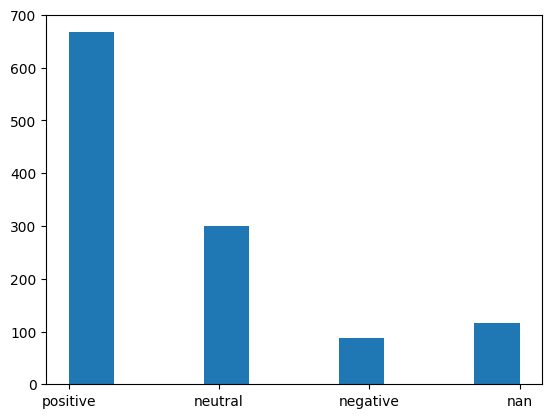

In [117]:
individual_received_df = received_df[received_df['sender'] == 'Elisabetta']

plt.hist(individual_received_df['sentiment'].tolist())
plt.show()

### media received

In [133]:
media_received_df = received_df[received_df['content'] == '<Media omitted>']
print(media_received_df.head())

# media_count_mapping = {
#     'Elisabetta': len(media_received_df[media_received_df['sender'] == 'Elisabetta']),
#     'Ahmad': len(media_received_df[media_received_df['sender'] == 'Ahmad']),
#     'Caro 🦋': len(media_received_df[media_received_df['sender'] == 'Caro 🦋']),
#     'Hani': len(media_received_df[media_received_df['sender'] == 'Hani']),
#     'Jason WG': len(media_received_df[media_received_df['sender'] == 'Jason WG']),
#     'Laura 🦁': len(media_received_df[media_received_df['sender'] == 'Laura 🦁']),
#     'Haris Trier': len(media_received_df[media_received_df['sender'] == 'Haris Trier']),
#     'Tobi Trier': len(media_received_df[media_received_df['sender'] == 'Tobi Trier']),
#     'Nataliia' : len(media_received_df[media_received_df['sender'] == 'Nataliia']),
#     '+49 1590 1487289': len(media_received_df[media_received_df['sender'] == '+49 1590 1487289']),
#     'Martina': len(media_received_df[media_received_df['sender'] == 'Martina']),
#     'Gloria': len(media_received_df[media_received_df['sender'] == 'Gloria']),
#     'Johanna': len(media_received_df[media_received_df['sender'] == 'Johanna']),
#     'Daniela TU': len(media_received_df[media_received_df['sender'] == 'Daniela TU']),
#     'Muhammad ahmed': len(media_received_df[media_received_df['sender'] == 'Muhammad ahmed']),
#     'Luca Maes WG': len(media_received_df[media_received_df['sender'] == 'Luca Maes WG']),
#     'Elvedin Kujovic': len(media_received_df[media_received_df['sender'] == 'Elvedin Kujovic']),
#     'Omkiran Malepati': len(media_received_df[media_received_df['sender'] == 'Omkiran Malepati']),
#     'Felix Sehmer': len(media_received_df[media_received_df['sender'] == 'Felix Sehmer']),
#     '+49 1573 0780310': len(media_received_df[media_received_df['sender'] == '+49 1573 0780310']),
#     'Marian': len(media_received_df[media_received_df['sender'] == 'Marian'])
# }

# media_received_count_df = pd.DataFrame(
#     {
#         'sender':media_received_df['sender'].unique()
#     }
# ) 

# media_received_count_df['media_count'] = media_received_df['sender'].map(media_count_mapping)

# media_received_count_df

# Initialize media_count_mapping with unique senders and count set to 0
unique_senders = media_received_df['sender'].unique()
media_count_mapping = {sender: 0 for sender in unique_senders}

# Update the counts based on the actual counts
for sender in unique_senders:
    media_count_mapping[sender] = len(media_received_df[media_received_df['sender'] == sender])

# Create media_received_count_df
media_received_count_df = pd.DataFrame({
    'sender': unique_senders,
    'media_count': [media_count_mapping[sender] for sender in unique_senders]
})

media_received_count_df.head()

         sender          content sentiment  year  month  day  gender  \
50   Elisabetta  <Media omitted>       NaN  2023      5    5  female   
62   Elisabetta  <Media omitted>       NaN  2023      5   15  female   
98   Elisabetta  <Media omitted>       NaN  2023      5   23  female   
101  Elisabetta  <Media omitted>       NaN  2023      5   23  female   
112  Elisabetta  <Media omitted>       NaN  2023      5   24  female   

     message_count  
50          1171.0  
62          1171.0  
98          1171.0  
101         1171.0  
112         1171.0  


,sender,media_count
0,Elisabetta,116
1,Ahmad,61
2,Caro 🦋,78
3,Hani,33
4,Jason WG,1


C:\Users\tahak\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129419 (\N{BUTTERFLY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tahak\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129409 (\N{LION FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


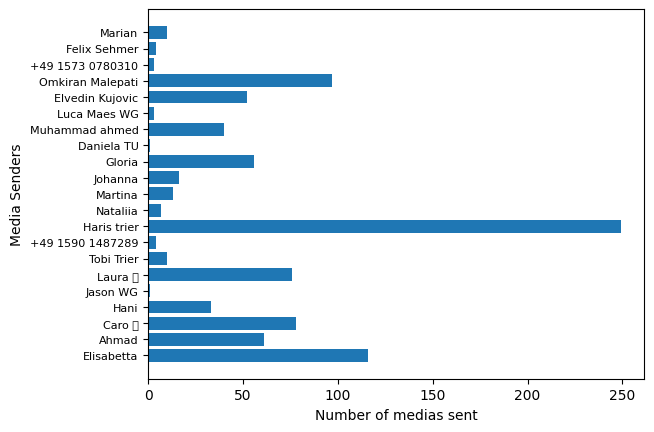

In [135]:
plt.barh('sender', 'media_count', data=media_received_count_df)
plt.xlabel('Number of medias sent')
plt.ylabel('Media Senders')
plt.yticks(fontsize=8,)
plt.show()

### Sentiment Comparison between genders

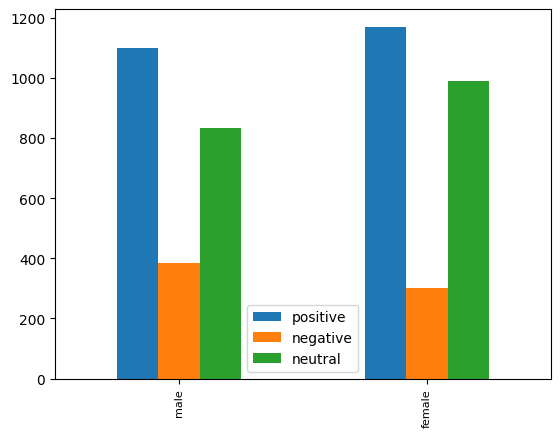

In [139]:
positive_df = received_df[received_df['sentiment'] == 'positive']
neutral_df = received_df[received_df['sentiment'] == 'neutral']
negative_df = received_df[received_df['sentiment'] == 'negative']


gender_sent_df = pd.DataFrame(
    {
        'positive' : [len(positive_df[positive_df['gender']=='male']), len(positive_df[positive_df['gender']=='female'])],
    'negative' : [len(negative_df[negative_df['gender']=='male']), len(negative_df[negative_df['gender']=='female'])],
    'neutral' : [len(neutral_df[neutral_df['gender']=='male']), len(neutral_df[neutral_df['gender']=='female'])]
    },
    index = ['male','female']
)

gender_sent_df.plot(kind = 'bar')
plt.xticks(fontsize=8)
plt.show()

In [140]:
received_df[received_df['sentiment'] == 'negative']

,sender,content,sentiment,year,month,day,gender,message_count
49,Elisabetta,Intestatario: JAROVA ELISABETTA,negative,2023,5,5,female,1171.0
106,Elisabetta,Wunderbar,negative,2023,5,24,female,1171.0
126,Elisabetta,And game,negative,2023,5,29,female,1171.0
173,Elisabetta,Oki,negative,2023,6,8,female,1171.0
288,Elisabetta,I won't buy it 😘,negative,2023,6,24,female,1171.0
...,...,...,...,...,...,...,...,...
9305,Martina,It's Martina,negative,2023,3,4,female,172.0
9340,Martina,I'll be in university in 5 minutes,negative,2023,3,8,female,172.0
9343,Martina,https://g.co/kgs/VGvZgA,negative,2023,3,8,female,172.0
9373,Martina,Und frohes Schaffen,negative,2023,3,16,female,172.0
